In [1]:
from rainmaker import rainmaker

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "tests/testdata/accept_main_table.txt"
cluster_name = "Abell 2597"

In [3]:
data = rainmaker.rainmaker_notebook_init(filename, cluster_name)


Matched cluster name to one in the table: ABELL_2597
   Name      Rin     Rout   nelec   ... tcool52  t52err  tcool32  t32err 
---------- ------- ------- -------- ... ------- -------- ------- --------
ABELL_2597 0.08328 0.09086 0.010248 ...  6.3758  0.56539  3.8255  0.33924
ABELL_2597 0.07571 0.08328 0.010591 ...  6.0834  0.61682    3.65   0.3701
ABELL_2597 0.06814 0.07571 0.012271 ...  5.3795  0.54404  3.2277  0.32642
ABELL_2597 0.06057 0.06814  0.01408 ...  4.5981  0.45683  2.7588   0.2741
ABELL_2597   0.053 0.06057 0.016118 ...  3.9332  0.38534  2.3599  0.23121
ABELL_2597 0.04543   0.053 0.022143 ...  2.8291  0.26501  1.6975  0.15901
ABELL_2597 0.03786 0.04543 0.026009 ...  2.2238  0.22594  1.3343  0.13556
ABELL_2597 0.03029 0.03786 0.032752 ...  1.6457  0.13393 0.98742 0.080358
ABELL_2597 0.02271 0.03029 0.035399 ...  1.4341  0.12024 0.86047 0.072145
ABELL_2597 0.01514 0.02271  0.04305 ...  1.1073 0.089195 0.66438 0.053517
ABELL_2597 0.00757 0.01514 0.065628 ... 0.70704 0.056622 0.

In [4]:
def plotter(x, y):
    plt.rcParams.update({'font.size': 22,
                         'axes.labelsize': 20,
                         'legend.fontsize': 16,
                         'xtick.labelsize': 18,
                         'ytick.labelsize': 18,
                         'axes.linewidth': 2})
    
    fig, ax = plt.subplots()
    ax.plot(x, y, 'b--',marker='s', label=r"$y = \alpha^2$")
    

In [5]:
def make_number_ordinal(num):
    '''Take number, turn into ordinal. E.g., "2" --> "2nd" '''

    SUFFIXES = {1: 'st', 2: 'nd', 3: 'rd'}

    if 10 <= num % 100 <= 20:
        suffix = 'th'
    else:
        # the second parameter is a default.
        suffix = SUFFIXES.get(num % 10, 'th')
    return str(num) + suffix


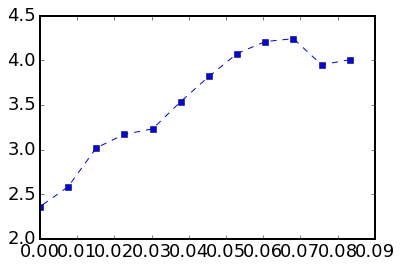

In [7]:
plotter(data['Rin'],data['Tx'])

In [26]:
def fit_polynomial(x, y, deg, yerror, whatIsFit):
    '''
    Fits a DEG-order polynomial in x, y space.
    A 3rd order polynomial is a cubic function
    '''

    print("-----------------------------------------------------")
    print("Fitting " + make_number_ordinal(deg) + " order polynomial to " + whatIsFit )
    print("-----------------------------------------------------")

    coeffs, covariance = np.polyfit(x, y, deg, w=yerror, full=False, cov=True)

    #chi2 = np.sum((np.polyval(coeffs, x) - y)**2)

    print(coeffs)
    print(covariance)
    return coeffs

In [56]:

def logTemp_fit(data):
    '''
    Fit the logarithmic electron density profile ln(n_e) (in cm^-3)
    to a polynomial in log r (in Mpc) of degree 'deg'.
    The array 'coeffs' returns the coefficients of that polynomial fit.
    '''
    whatIsFit = "ln kT (keV) in log radius (Mpc) of degree DEG"

    deg = 3

    r = (data['Rin'] + data['Rout']) * 0.5
    logr = np.log(r) # this is the NATURAL logarithm, ln

    t = np.absolute(data['Tx'])
    terr = data['Txerr']
    
    logt = np.log(t)
    logterr = np.log(terr / t)

    yerror = logterr

    coeffs = fit_polynomial(logr, logt, deg, yerror, whatIsFit)

    logtfit = np.zeros(np.shape(logr))

    for i in np.arange(deg+1):
        print("INDEX IS: %s" % i)
        logtfit = logtfit + coeffs[i]*logr**float(i)
        print(logtfit)

    tfit = np.exp(logtfit)
    
    #plt.scatter(r,data['Tx'], marker='o')
    plt.plot(r,tfit)
    plt.show()

    return coeffs

-----------------------------------------------------
Fitting 3rd order polynomial to ln kT (keV) in log radius (Mpc) of degree DEG
-----------------------------------------------------
[-0.03910386 -0.43712524 -1.3441657   0.17799352]
[[  5.48210608e-04   6.51989590e-03   2.47411201e-02   2.99994499e-02]
 [  6.51989590e-03   7.78293621e-02   2.96502483e-01   3.60892917e-01]
 [  2.47411201e-02   2.96502483e-01   1.13451797e+00   1.38699650e+00]
 [  2.99994499e-02   3.60892917e-01   1.38699650e+00   1.70363471e+00]]
INDEX IS: 0
      Rin       
----------------
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
-0.0391038559261
INDEX IS: 1
     Rin     
-------------
1.02793759589
1.06772397715
1.11146719461
1.16007957684
1.21478248901
1.27732363653
 1.3503310443
1.43802594489
1.54792764194
 1.6950906326
 1.9183854048
2.39861656261
INDEX IS: 2
     Rin 

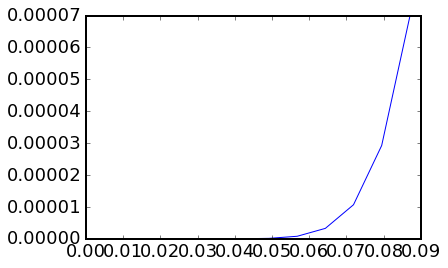

array([-0.03910386, -0.43712524, -1.3441657 ,  0.17799352])

In [57]:
logTemp_fit(data)

In [ ]:
; Routine RG_DATA determines the gravitational potential corresponding to
;  fits (PFIT and TFIT) to the ACCEPT pressure and temperature profiles.
;  RG gives the potential as the radius times the gravitational 
;  acceleration in cgs units.




The cooling function is:

$\Lambda(T) = [C_1 \left( \frac{k_B T}{\mathrm{keV}} \right)^{-1.7} + C_2\left( \frac{k_B T}{\mathrm{keV}} \right)^{0.5} + C_3] \times 10^{-22}$

In [9]:
import astropy.units as u
8.6e-3 * (u.erg / (u.cm**3 * u.s))

<Quantity 0.0086 erg / (cm3 s)>

In [33]:
def coolingFunction(kT_keV):
    '''
    Implement the Tozzi & Norman (2001) cooling function, 
    as shown in Parrish+
    '''
    
    kT_keV = kT_keV * u.keV
    
    # For a metallicity of Z = 0.3 Z_solar, 
    C1 = 8.6e-3 * u.erg / (u.cm**3 * u.s)
    C2 = 5.8e-3 * u.erg / (u.cm**3 * u.s)
    C3 = 6.3e-2 * u.erg / (u.cm**3 * u.s)

    alpha = -1.7
    beta = 0.5

    coolingFunc = ((C1 * kT_keV**alpha) + (C2 * kT_keV**beta) + C3)**1e-22

    return coolingFunc


In [34]:
stuff = coolingFunction(data['Tx'])

UnitConversionError: Can only apply 'add' function to quantities with compatible dimensions

In [27]:
stuff

<Quantity [ 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]>

In [28]:
data['Tx']

4.0052
3.9491
4.2416
4.2094
4.0748
3.8184
3.5377
3.2308
3.1708
3.0181
2.5829


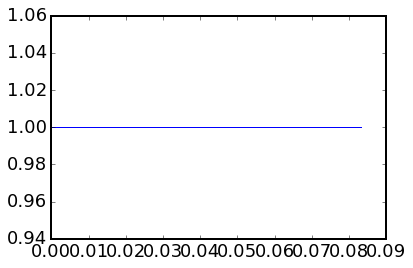

In [29]:
plt.plot(data['Rin'],stuff)

In [48]:
def coolingFunction(kT):
    '''
    Implement the Tozzi & Norman (2001) cooling function,
    as shown in Parrish, Quataert, & Sharma (2009) eq. 16. 

    $\Lambda(T) = [C_1(k_B T)^{-1.7} + C_2(k_B T)^{0.5} + C_3] \times 10^{-22}$
    '''

    keV = u.eV * 1000.0
    kT_keV = kT * keV

    # For a metallicity of Z = 0.3 Z_solar, 
    C1 = 8.6e-3 * u.erg / (u.cm**3 * u.s)
    C2 = 5.8e-3 * u.erg / (u.cm**3 * u.s)
    C3 = 6.3e-2 * u.erg / (u.cm**3 * u.s)

    alpha = -1.7
    beta = 0.5

    coolingFunction = ((C1 * (kT_keV / keV)**alpha) + (C2 * (kT_keV / keV)**beta) + C3)*1e-22

    return coolingFunction

In [49]:
test = coolingFunction(data['Tx'])

In [50]:
test

<Quantity [  7.54204379e-24,  7.53585879e-24,  7.56825753e-24,
             7.56467630e-24,  7.54973951e-24,  7.52152792e-24,
             7.49129483e-24,  7.45964758e-24,  7.45371463e-24,
             7.43912315e-24,  7.40350379e-24,  7.39079108e-24] erg / (cm3 s)>

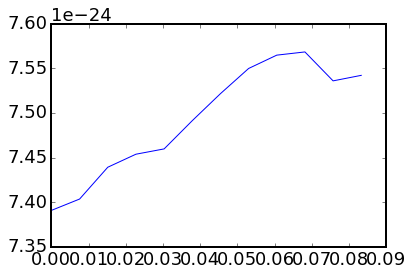

In [51]:
plt.plot(data['Rin'],test)